# te

> Data from te

In [ ]:
#| default_exp data.te

In [ ]:
#| exporti
import pandas as pd
import requests

USER_AGENT = {'User-agent': 'Mozilla/5.0'}

TICKER_MAP = {
    'spx:ind': '/spx:ind'
}

def _get_auth_token(auth_url):
    full_auth_url = 'https://tradingeconomics.com' + auth_url
    # print(full_auth_url)

    r = requests.get(full_auth_url, headers=USER_AGENT)
    auth_token = r.text.split("""    TESecurify = """)[1][:100].split('\'')[1]
    return auth_token

def _get_data(s, auth_url, auth_token, span=None, d1=None, d2=None, interval=None):
    data_url = 'https://markets.tradingeconomics.com/chart?'
    data_url += f's={s}&'
    if span != None:
        data_url += f'span={span}&'
    elif (d1 != None) & (d2 != None):
        data_url += f'd1={d1}&'
        data_url += f'd2={d2}&'
    else:
        data_url += f'span=max&'
    if interval != None:
        data_url += f'interval={interval}&'
    data_url += f'securify=new&'
    data_url += f'url={auth_url}&'
    data_url += f'AUTH={auth_token}&'
    data_url += f'ohlc=0'

    # print(data_url)

    r = requests.get(data_url, headers=USER_AGENT)
    data = pd.DataFrame.from_dict(r.json()['series'][0]['data'])

    data.date = pd.to_datetime(data.date)
    data = data.set_index('date').loc[:, ['y']].rename(columns={'y': 'close'})
    
    return data

In [ ]:
#| export
def get_data(ticker):
    auth_url = TICKER_MAP[ticker]
    auth_token =_get_auth_token(auth_url)
    data = _get_data(ticker, auth_url, auth_token)
    return data

In [ ]:
get_data('spx:ind')

,close
date,
1928-01-03,17.57000
1928-02-01,17.26000
1928-03-01,19.13000
1928-04-02,19.75000
1928-05-01,20.00000
...,...
2022-08-01,3955.00000
2022-09-01,3585.62000
2022-10-03,3871.98000


<AxesSubplot: xlabel='date'>

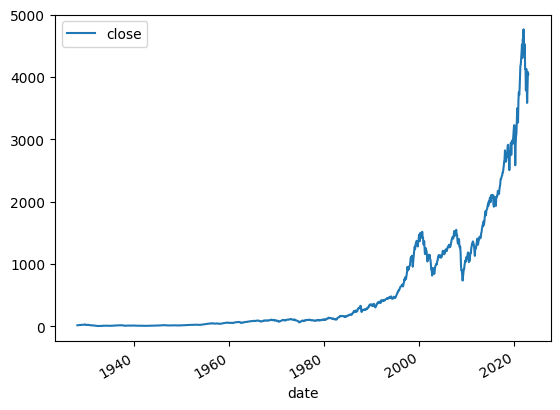

In [ ]:
get_data('spx:ind').plot()

In [ ]:
# s='foo:ind'
# auth_url='/spx:ind'

# auth_token =_get_auth_token(auth_url)
# df = _get_data(s, auth_url, auth_token)

# df.date

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()